# Data Science Project

## Introduction

The project objective is to  generate knowledge by validating a hypothesis based on the given dataset

To accomplish this, the following is defined:

- **Dataset.** The selected dataset is about soccer which contains information related to each player registered in the FIFA 2017 video game, including statistical information of each player and some personal data


- **Hipothesis to validate.**  Is there any relationship exist among age, nationality, preferred foot, position, date joined to club, data about loaned club, date valid contract, height, weight and release clause to determine value and wage player?

<img src="https://www.freewebheaders.com/wp-content/gallery/football/sports-soccer-stadium-night-scene-web-header.jpg" style="width: 100%"/>

## Pre-processing preparation

### Necessary libraries

The libraries needed to manipulate the dataset are:
- **pandas**
- **re**
- **numpy**

For the predictive model:
- **sklearn**

For plotting figures:
- **matplotlib**
- **seaborn**


In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

### Dataset to import


As mentioned in the introduction, the variables to extract from the data set are the following:

- ID
- Age
- Nationality
- Club
- Value
- Wage
- Preferred Foot
- Position
- Joined
- Loaned From
- Contract Valid Until
- Height
- Weight
- Release Clause

Those variables are renamed in the *dataframe* to improve accessibility in the code.

In [ ]:
dataframe = (pd.read_csv("futbol.csv")).filter(["ID", "Age", "Nationality","Club","Value", "Wage", "Preferred Foot", "Position", "Joined","Loaned From", "Contract Valid Until", "Height", "Weight", "Release Clause"]).rename(columns={"Preferred Foot":'Preferred_foot', 'Loaned From': 'Loaned_from', 'Contract Valid Until':'Contract_Valid_Until', 'Release Clause': 'Release_clause'})

*dataframe* is visualized.

In [ ]:
dataframe

## Data mining

In this secion the *dataframe* is cleaned to prepare it for **data visualization** and the **predictive model**.

### Data cleaning

Columns/variables data types are checked.

In [ ]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

Due to the variable age is integer type, the maximum and minimum value is found.

In [ ]:
pd.DataFrame(dataframe[['Age']].max(), columns=['Valor máximo'])

In [ ]:
pd.DataFrame(dataframe[['Age']].min(), columns=['Valor Mínimo'])

The same is done for the *ID* column.

In [ ]:
pd.DataFrame(dataframe[['ID']].max(), columns=['Valor máximo'])

In [ ]:
pd.DataFrame(dataframe[['ID']].min(), columns=['Valor mínimo'])

Columns have no negative values and the maximums are known, so it's possible to change the data type to improve performance.

In [ ]:
dataframe = dataframe.astype({"ID": np.uint32, 'Age': np.uint8})

*dataframe* null data are visualized.

In [ ]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

**Important note:** In the situation context, it's possible to assign default values for null data of **Club** and **Realease_clause** columns.

Intersected null data from the following columns are displayed:

- Preferred_foot
- Position
- Joined
- Loaned_from
- Contract_Valid_Until
- Height
- Weight

In [ ]:
dataframe[pd.isnull(dataframe[['Preferred_foot', 'Position', 'Joined', 'Loaned_from', 'Contract_Valid_Until','Height', 'Weight']]).all(axis=1)]


As it can be inferred that the null data rows are the same in **Weight**, **Height** and **Position** columns, these rows can be deleted from any mentioned columns.

In [ ]:
dataframe.dropna(subset=['Position'], inplace=True)

*dataframe* is displayed.

Null data is checked again.

In [ ]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

**Nota importante:** It's not validated but it's possible to think that null data in **Club** and **Contract_Valid_Until** columns are the same.

Remaining columns which is not possible to assign default values are the following:

- Joined
- Loaned_from
- Contract_Valid_Until

Intersected null data from these columns are shown:

In [ ]:
dataframe[pd.isnull(dataframe[['Joined', 'Loaned_from', 'Contract_Valid_Until']]).all(axis=1)]

It's possible to infer that all rows are from **Contract_Valid_Until** column, therefore such data is removed.

In [ ]:
dataframe.dropna(subset=['Contract_Valid_Until'], inplace=True)

*dataframe* is displayed.

In [ ]:
dataframe

Remaining null data are shown.

In [ ]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

**Nota importante:** By observing the dataset, it's possible to conclude that **Joined** column is exclusive to **Loaned From**.

To validate the last  statement, **Loaned_from** column null data are displayed along  not null data from the **Joined** column

In [ ]:
dataframe[dataframe.Loaned_from.isnull() & dataframe.Joined.isnull()==False]

As it seems all the rows are shown, it does the following for last validation:
- Shape of the null data from **Loaned_from** and not null data from **Joined** is the same shape from dataframe.

In [ ]:
dataframe[dataframe.Loaned_from.isnull() & dataframe.Joined.isnull()==False].values.shape == dataframe.shape

To manage this case, a **Joined** columns is rename to **Loaned** for representing if the player is loaned.

In [ ]:
dataframe.rename({'Joined': 'Loaned'}, axis=1, inplace=True)

*dataframe* **Loaned** column is reassigned to store boolean values based on null data and not null data from that column.

In [ ]:
dataframe.Loaned = dataframe.Loaned.isnull()

First 30 *dataframe* **Loaned** column null data rows is displayed.

In [ ]:
dataframe[dataframe.Loaned == True].head(n=30)

First 30 *dataframe* **Loaned** column non-null data rows is displayed.

In [ ]:
dataframe[dataframe.Loaned == False].head(n=10)

As the **Loaned** is a column which replaces the **Loaned_from** and **Joined** columns, then the **Loaned_from** is removed.

In [ ]:
dataframe.drop(['Loaned_from'], axis=1, inplace=True)

*dataframe* is displayed.

In [ ]:
dataframe

Remaining null data is shown.

In [ ]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

**Important note:** It can be observed that **Release_clause** is the remaining column with null data

The null data **Release_clause** is reassign to '*€0M*' .

In [ ]:
dataframe.loc[dataframe.Release_clause.isnull(),'Release_clause']='€0M'

 **Release_clause**'s reassigned null data  is displayed.

In [ ]:
dataframe[dataframe.Release_clause =='€0M']

**Important note:** It´s observavble that the raplacement was succesfully.

A final null data check is realized.

In [ ]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

**Important note:** There is no null data left.

Data types of each column is displayed.

In [ ]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

**Important note:** Data types of **Value**, **Wage**, **Height** y **Release_clause** columns are object/string data type instead of any numerica data type.

A pattern can be observed from the dataset in **Value**, **Wage** and **Release_clause** columns which contains the following characters:
As prefix:

-  *€*

As postfix:
- *K* or *M*

Regular expression is used to validate that all rows from those columns match.

The regular expression is:
- *€(([1-9]|[1-9][0-9]|[1-5][0-9]{2}|600)(?:\.[0-9]{1,2}){0,1}[MK]|0)*


In [ ]:
all(dataframe[['Value','Wage','Release_clause']].apply(lambda series:[re.fullmatch('€(([1-9]|[1-9][0-9]|[1-5][0-9]{2}|600)(?:\.[0-9]{1,2}){0,1}[MK]|0)', value) for value in series]))

After validating that all rows match to regular expression, the numbers are extracted from each string value, convert them to the indicated data type and reasssigned to its respective column.

Regular expression used for extracting numbers is:
- *(\d+(?:\.\d+)?)*


In [ ]:
np.uint32(dataframe[['Value','Wage', 'Release_clause']].apply(lambda series: [np.float16(tupla[1])*1000
           if ('M' in tupla[0]) else tupla[1] for tupla in [(value,re.findall('(\d+(?:\.\d+)?)', value)[0]) for value in series]]))

In [ ]:
dataframe[['Value','Wage', 'Release_clause']] = np.uint32(dataframe[['Value','Wage', 'Release_clause']].apply(lambda series: [tupla[1]*1000
    if ('M' in tupla[0]) else tupla[1] for tupla in [(value, np.float16(re.findall('(\d+(?:\.\d+)?)', value)[0])) for value in series]]))

**Weight** column contains a string representing the value in pounds (*lbs*) with the following character:
Postfix:
- *lbs*

This is validated using a regular expression that confirms the postfix in all rows and the numbers are not greater than 251.

The regular expression used is the following:
- *((8\d|9\d|1\d{2}|2[0-4]\d|250))lbs*

In [ ]:
all([re.fullmatch('((8\d|9\d|1\d{2}|2[0-4]\d|250))lbs', value) for value in dataframe.Weight])

After verifying the above, the numbers are extracted from the string value, convert them into the indicated data type and reassigned to the **Weigth** column.
The regular expression used for extracting numbers is the following:
- *(\d+(?:\.\d+)?)*

In [ ]:
dataframe.Weight = np.uint8((dataframe.Weight.apply(lambda x: re.findall('(\d+(?:\.\d+)?)', x)[0])))

**Height** column contains a string representing the value in feet and inches with the following character:
Infix:
- *'*
-
It´s validated tha all rows match with that infix, feets are not greater than 8 and inches are not greater than 12 using the following regular expression:
- *[0-7]\'(1[0-2]|\d)*

In [ ]:
all([re.fullmatch('[0-7]\'(1[0-2]|\d)', value) for value in dataframe.Height])

After verifying above, then all numbers are extracted fromt he string value, converted to the indicated data type and manipulated to be converted to only inches and reassigned to the **Heigth** column.

In [ ]:
dataframe.Height = [np.uint8(y[0]*12+y[1]) for y in [[np.uint8(y) for y in x.split("'")] for x in dataframe.Height]]

**Importante note:** Conversion is applied to interpret in a better way the **Height** column values.

Due to the complexity in the **Contract_Valid_Until** columns which contains in some rows much information, decision has been made to extract only the year.

The following regular expression is used to detect numbers between 2015 and 2026:
- *(201[5-9]|202[0-6])*

In [ ]:
all([re.findall('(201[5-9]|202[0-6])', x) for x in dataframe.Contract_Valid_Until])

After verifying the above, the year is extracted, converted into the indicated data type and reassigned to the **Contract_Valid_Until** column.

In [ ]:
# cProfile.run('dataframe.Contract_Valid_Until.apply(lambda x: np.uint16(re.findall(\'20[1-2][0-9]\', x)[0]))')

In [ ]:
# cProfile.run('[np.uint16(re.findall(\'20[1-2][0-9]\', x)[0]) for x in dataframe.Contract_Valid_Until]')

In [ ]:
dataframe.Contract_Valid_Until = dataframe.Contract_Valid_Until.apply(lambda x: np.uint16(re.findall('20[1-2][0-9]', x)[0]))

Given the **Preferred_foot** column has to have string values by default, it checks what string values and how often each string value is.

In [ ]:
pd.DataFrame((lambda x:{'Preferred_foot':x.index})(dataframe.Preferred_foot.value_counts()))

**Important note:** It can be observed that the only string values are *Left* and *Right*.

The new assigned data types are shown:

In [ ]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

*dataframe* is displayed.

In [ ]:
dataframe

### Dataframe normalizaton

A *dataframe* copy is realized to *normalizedDataframe*

In [ ]:
normalizedDataframe = dataframe.copy()

*normalizedDataframe* is displayed.

In [ ]:
normalizedDataframe

**Important note:** Some columns are not able to normalize because are string data type, then it's necessary to create a subset for those columns.

A dataframe is created from a **Nationality** column set and the frecuency of this set.

In [ ]:
countryDataframe = pd.DataFrame((lambda x:{'Nationality':x.index, 'Frequency':x.values.astype('uint16')})(dataframe.Nationality.value_counts()))

*countryDataframe* is displayed.

In [ ]:
countryDataframe

A dataframe is created from a **Club** column set and the frecuency of this set.

In [ ]:
clubDataframe = pd.DataFrame((lambda x:{'Club':x.index, 'Frequency':x.values.astype('uint16')})(dataframe.Club.value_counts()))

*clubDataframe* is displayed.

In [ ]:
clubDataframe

A dataframe is created from a **Preferred_foot** column set and the frecuency of this set.

In [ ]:
preferredFootDataframe = pd.DataFrame((lambda x:{'Preferred_foot':x.index, 'Frequency':x.values.astype('int16')})(dataframe.Preferred_foot.value_counts()))

*Preferred_foot* is displayed.

In [ ]:
preferredFootDataframe

A dataframe is created from a **Position** column set and the frecuency of this set.

In [ ]:
positionDataframe = pd.DataFrame((lambda x:{'Position':x.index, 'Frequency':x.values.astype('int16')})(dataframe.Position.value_counts()))

*positionDataframe* is displayed.

In [ ]:
positionDataframe

A dataframe is created from a **Loaned** column set and the frecuency of this set..

In [ ]:
loanedDataframe = pd.DataFrame((lambda x:{'Loaned':x.index, 'Frequency':x.values.astype('int16')})(dataframe.Loaned.value_counts()))

*loanedDataframe* is displayed.

In [ ]:
loanedDataframe

In automatic manner, the values from the **Nationality**, **Club**, **Preferred_foot**, **Position** y **Loaned** columns are replaced with the values from the geneerated subsets.

In [ ]:
for tupla in {'Nationality': countryDataframe, 'Club':clubDataframe, 'Preferred_foot':preferredFootDataframe, 'Position':positionDataframe, 'Loaned':loanedDataframe}.items():
    normalizedDataframe[tupla[0]] = dataframe[tupla[0]].apply(lambda x:(tupla[1][tupla[0]].loc[tupla[1][tupla[0]] == x].index[0]))

In [ ]:
import cProfile
cProfile.run('for tupla in {\'Nationality\': countryDataframe, \'Club\':clubDataframe, \'Preferred_foot\':preferredFootDataframe,\'Position\':positionDataframe, \'Loaned\':loanedDataframe}.items(): normalizedDataframe[tupla[0]] = dataframe[tupla[0]].apply( lambda x:(tupla[1][tupla[0]].loc[tupla[1][tupla[0]] == x].index[0]))')

*normalizedDataframe* is overwritten with an instace of *MinMaxScaler* with *normalizedDataframe* as parameter

In [ ]:
normalizedDataframe = pd.DataFrame(MinMaxScaler().fit_transform(normalizedDataframe).astype('float32'), columns=normalizedDataframe.columns)

*normalizedDataframe* is displayed.

In [ ]:
normalizedDataframe

## Data visualization

Some graphs are plotted to visualize and better understand the normalizedDataframe.

Como primer paso, se visualiza las graficas de tipo histograma de todas las columnas del dataframe normalizado.

In [ ]:
plt.bar(preferredFootDataframe.Preferred_foot, preferredFootDataframe.Frequency, color ='maroon',width = 0.5)
plt.xlabel("Preferred foot")
plt.ylabel("Preferred foot frequency")
plt.title("Player preferred foot  frequency bar plot")

In [ ]:
plt.figure(figsize=(20, 10))
plt.xlabel("Position")
plt.ylabel("Position frequency")
plt.title("Player position frequency bar plot")
plt.bar(positionDataframe.Position, positionDataframe.Frequency, color ='maroon',width =.9)

In [ ]:
plt.bar(positionDataframe.Position, positionDataframe.Frequency, color ='maroon',width = 1)
plt.xlabel("Position")
plt.ylabel("Position frequency")
plt.title("Player position frequency bar plot")

Como segundo paso, se visualiza las gráficas de tipo dispersión todas las columnas a excepción de la columna **ID** común.

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Age**.

In [ ]:
# dataframe.plot.scatter(x = 'ID', y = 'Age', s = 10, c = 'red', figsize=(5,5))
# plt.show()


Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Nationality**.

In [ ]:
dataframe.plot.scatter(x = 'ID', y = 'Nationality', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Club**.

In [ ]:
dataframe.plot.scatter(x = 'ID', y = 'Club', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Value**.

In [ ]:
dataframe.plot.scatter(x = 'ID', y = 'Value', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Wage**.

In [ ]:
dataframe.plot.scatter(x = 'ID', y = 'Wage', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Preferred_foot**.

In [ ]:
dataframe.plot.scatter(x = 'ID', y = 'Preferred_foot', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Position**.

In [ ]:
dataframe.plot.scatter(x = 'ID', y = 'Position', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Loaned**.

In [ ]:
dataframe.plot.scatter(x = 'ID', y = 'Loaned', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Contract_Valid_Util**.

In [ ]:
dataframe.plot.scatter(x = 'ID', y = 'Contract_Valid_Until', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Heigth**.

In [ ]:
dataframe.plot.scatter(x = 'ID', y = 'Height', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Weight**.

In [ ]:
dataframe.plot.scatter(x = 'ID', y = 'Weight', s = 10, c = 'red', figsize=(5,5))
plt.show()

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Release_clause**.

In [ ]:
dataframe.plot.scatter(x = 'ID', y = 'Release_clause', s = 10, c = 'red', figsize=(5,5))
plt.show()

Como último paso, se visualiza la gráfica de tipo correlación para observar las relaciones mas significativas entre las columnas del dataframe normalizado.

In [ ]:
plt.figure(figsize=(30,30))
sb.heatmap(normalizedDataframe.corr(), cmap ='Blues', linewidths = 0.30, annot = True)
plt.show()

In [ ]:
plt.bar(preferredFootDataframe.Preferred_foot, preferredFootDataframe.Frequency, color ='maroon',width = 0.5)
plt.xlabel("Preferred foot")
plt.ylabel("Preferred foot frequency")
plt.title("Player preferred foot  frequency bar plot")

## Predictive modelling

In [ ]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [ ]:


import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#data generation
import numpy as np
np.random.seed(123)
date_range = pd.period_range('1981-01-01','1981-01-04',freq='D')
x = np.random.randint(1, 10, (4,2))
y = np.random.randint(1, 10, (4,2))
x = pd.DataFrame(x, index = date_range, columns = ['station1','station2'])
y = pd.DataFrame(y, index = date_range + pd.to_timedelta(1, unit="D"), columns = ['station1','station2'])

#keep information where each data point comes from
x["key"], y["key"] = "x", "y"

#combining dataframes and reshaping
df = pd.concat([x, y]).melt(["key"], var_name="station", value_name="station_value",  ignore_index = False)

#plotting - the datetime conversion might not be necessary
#depending on the datetime format of your original dataframes
#best approach is conversion to datetime index when creating the dataframes
fg = sns.relplot(data=df, x = pd.to_datetime(df.index.to_timestamp()), y = "station_value", kind = "line", hue = "key", row = "station")

#shouldn't be necessary but this example had too many ticks for the interval
# from matplotlib.dates import DateFormatter, DayLocator
# fg.axes[0,0].xaxis.set_major_locator(DayLocator(interval=1))
# fg.axes[0,0].xaxis.set_major_formatter(DateFormatter("%y-%m-%d"))

plt.show()

In [ ]:
dataframe.loc[0]

In [ ]:
sb.pairplot(dataframe[['Value', 'Wage', 'Release_clause', 'Preferred_foot']], hue='Preferred_foot',palette=sb.color_palette("Paired"))


In [ ]:
sb.pairplot(dataframe[['Value', 'Wage', 'Release_clause', 'Loaned']], hue='Loaned',palette=sb.color_palette("Paired"))


In [ ]:
positionDataframe

Se procede a visualizar gráfica de tipo dispersión entre la columna **ID** y **Release_clause**.

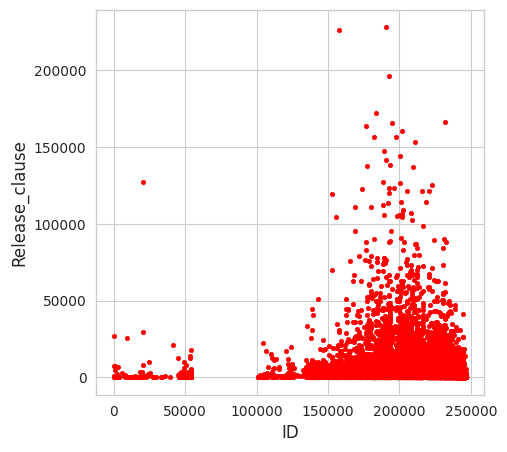

In [105]:
dataframe.plot.scatter(x = 'ID', y = 'Release_clause', s = 10, c = 'red', figsize=(5,5))
plt.show()

Como último paso, se visualiza la gráfica de tipo correlación para observar las relaciones mas significativas entre las columnas del dataframe normalizado.

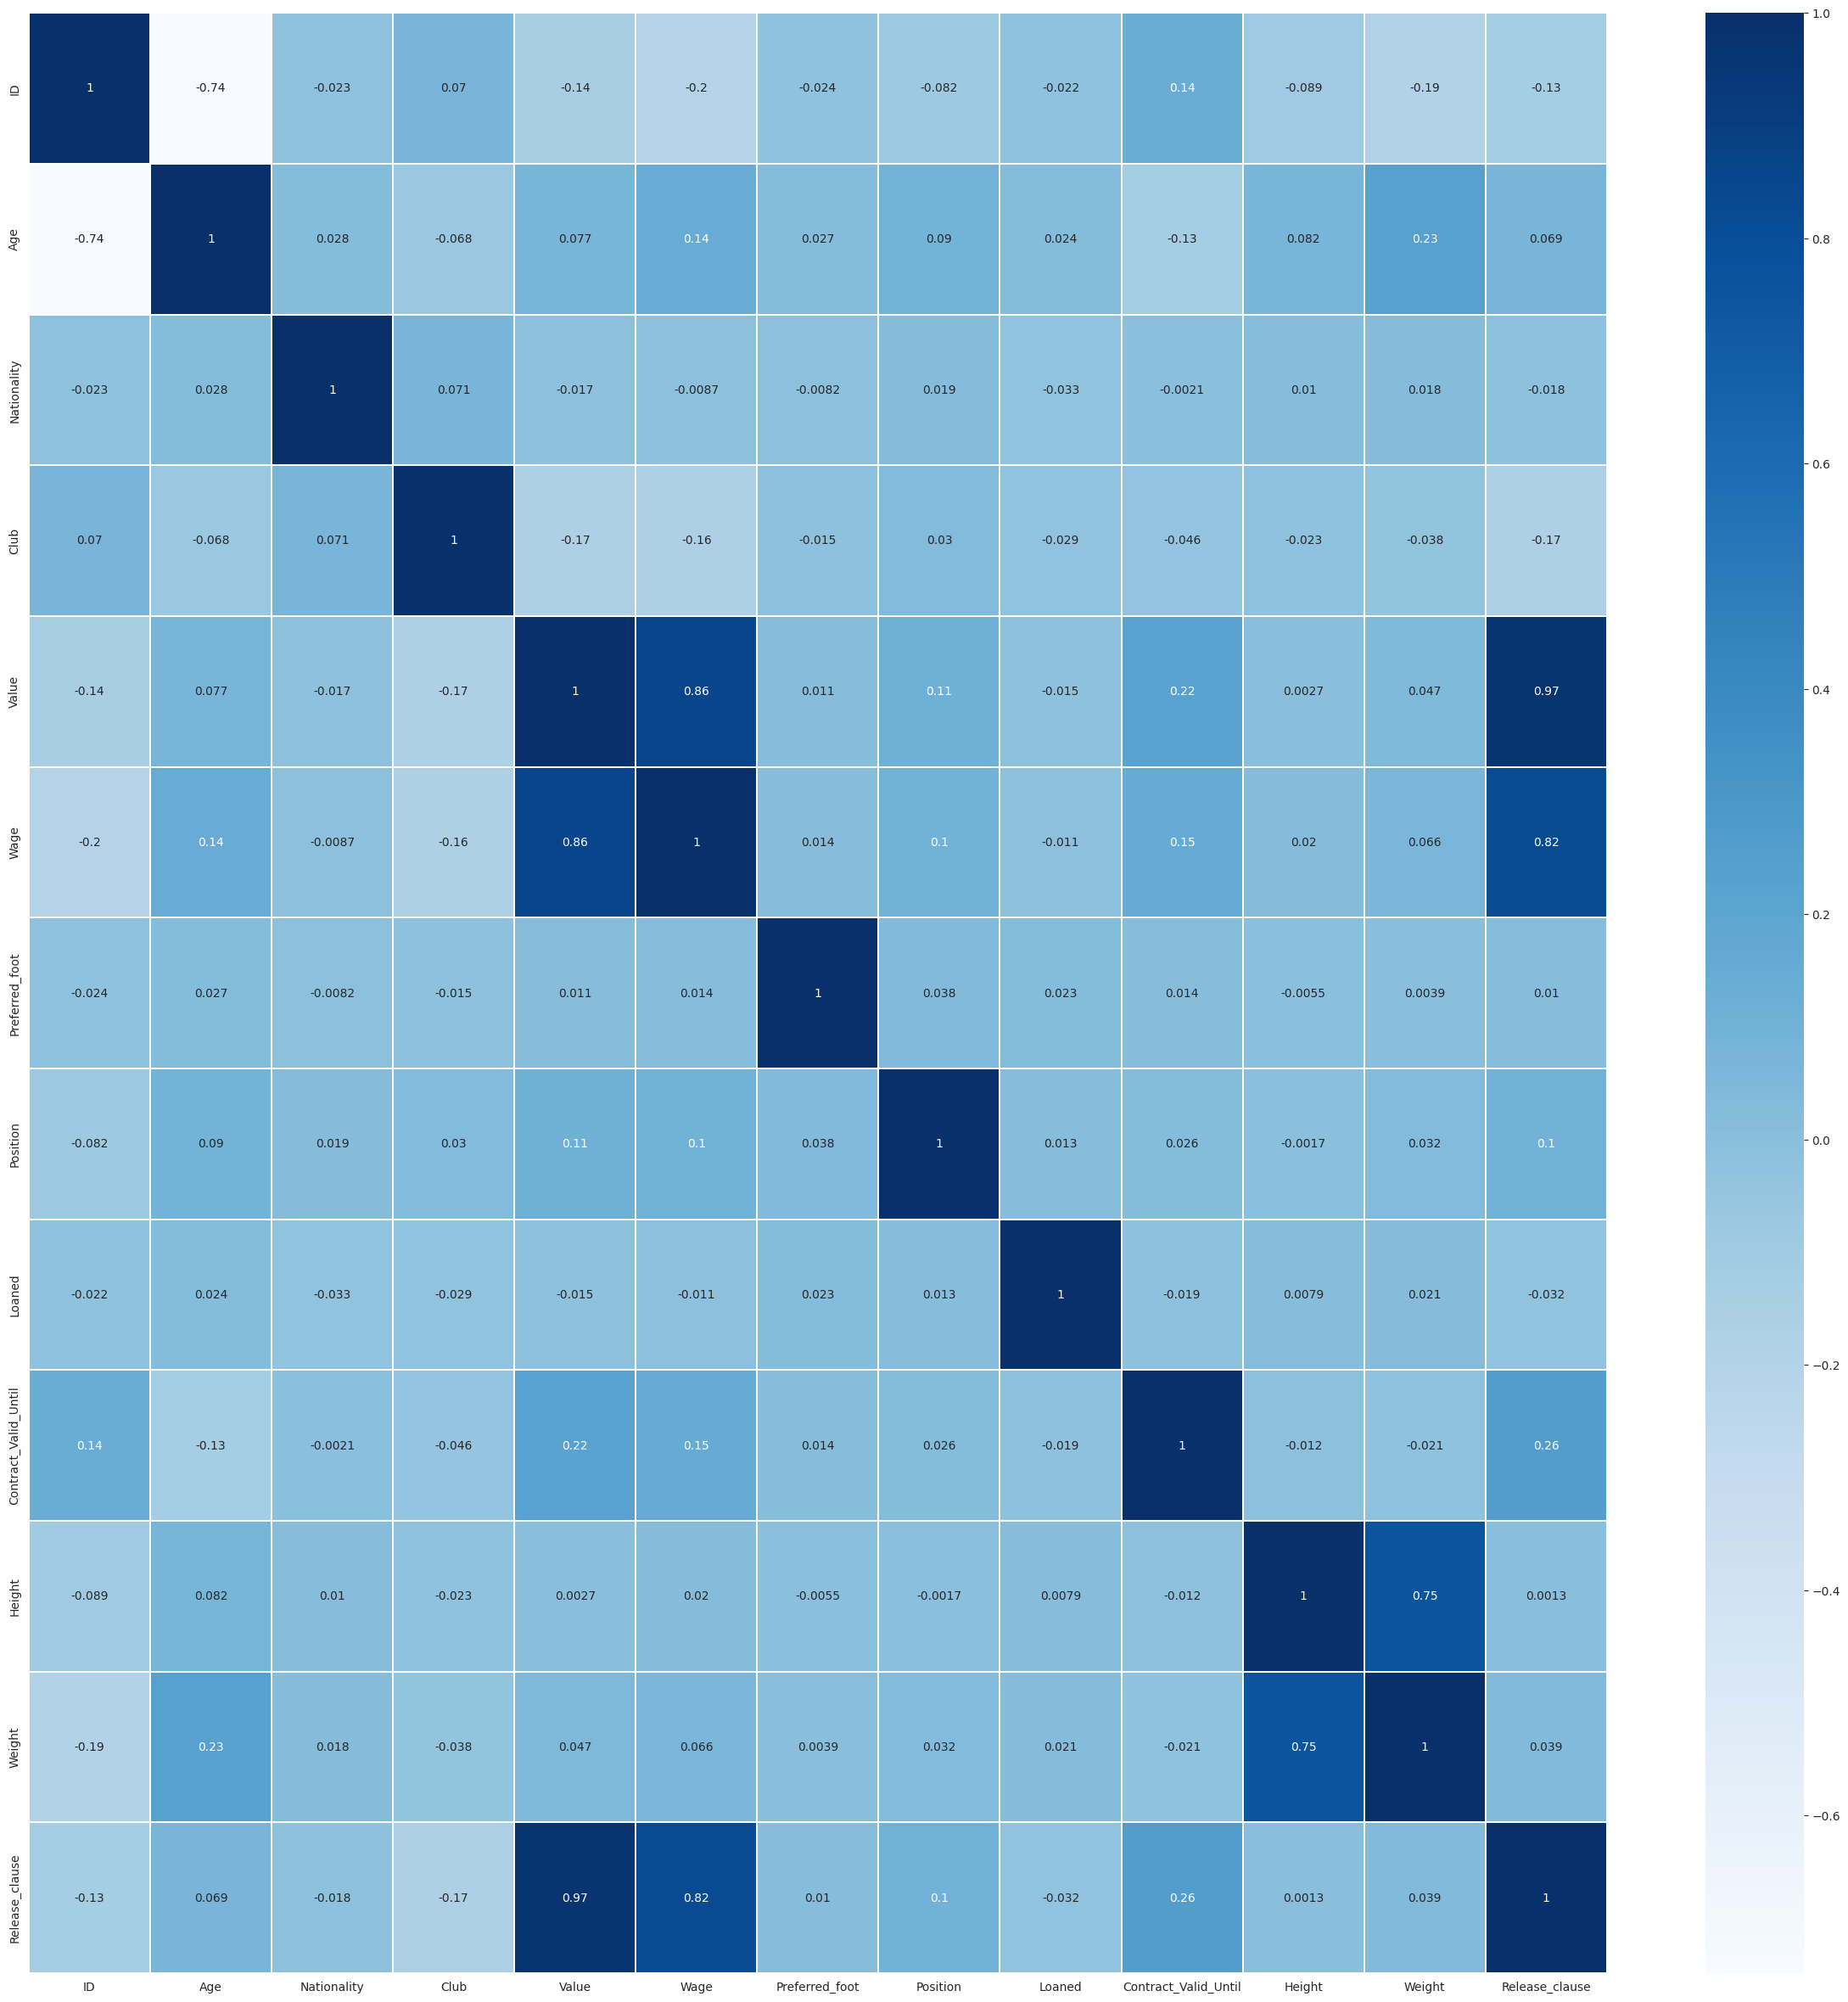

In [106]:
plt.figure(figsize=(30,30))
sb.heatmap(normalizedDataframe.corr(), cmap ='Blues', linewidths = 0.30, annot = True)
plt.show()

Text(0.5, 1.0, 'Player preferred foot  frequency bar plot')

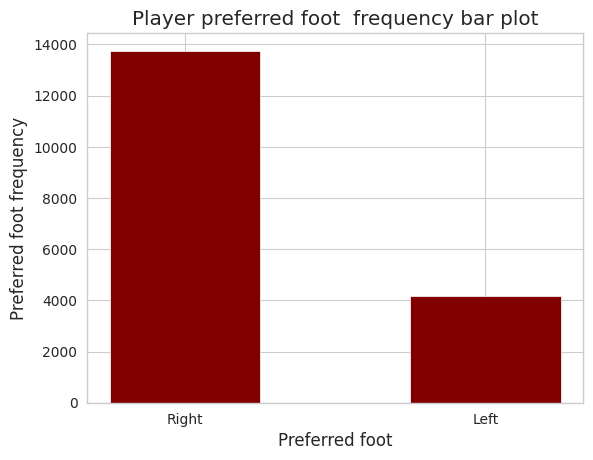

In [107]:
plt.bar(preferredFootDataframe.Preferred_foot, preferredFootDataframe.Frequency, color ='maroon',width = 0.5)
plt.xlabel("Preferred foot")
plt.ylabel("Preferred foot frequency")
plt.title("Player preferred foot  frequency bar plot")

## Predictive modelling

In [ ]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [ ]:


import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#data generation
import numpy as np
np.random.seed(123)
date_range = pd.period_range('1981-01-01','1981-01-04',freq='D')
x = np.random.randint(1, 10, (4,2))
y = np.random.randint(1, 10, (4,2))
x = pd.DataFrame(x, index = date_range, columns = ['station1','station2'])
y = pd.DataFrame(y, index = date_range + pd.to_timedelta(1, unit="D"), columns = ['station1','station2'])

#keep information where each data point comes from
x["key"], y["key"] = "x", "y"

#combining dataframes and reshaping
df = pd.concat([x, y]).melt(["key"], var_name="station", value_name="station_value",  ignore_index = False)

#plotting - the datetime conversion might not be necessary
#depending on the datetime format of your original dataframes
#best approach is conversion to datetime index when creating the dataframes
fg = sns.relplot(data=df, x = pd.to_datetime(df.index.to_timestamp()), y = "station_value", kind = "line", hue = "key", row = "station")

#shouldn't be necessary but this example had too many ticks for the interval
# from matplotlib.dates import DateFormatter, DayLocator
# fg.axes[0,0].xaxis.set_major_locator(DayLocator(interval=1))
# fg.axes[0,0].xaxis.set_major_formatter(DateFormatter("%y-%m-%d"))

plt.show()

In [79]:
dataframe.loc[0]

ID                            158023
Age                               31
Nationality                Argentina
Club                    FC Barcelona
Value                         110500
Wage                             565
Preferred_foot                  Left
Position                          RF
Loaned                         False
Contract_Valid_Until            2021
Height                            67
Weight                           159
Release_clause                226500
Name: 0, dtype: object

/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/jerr

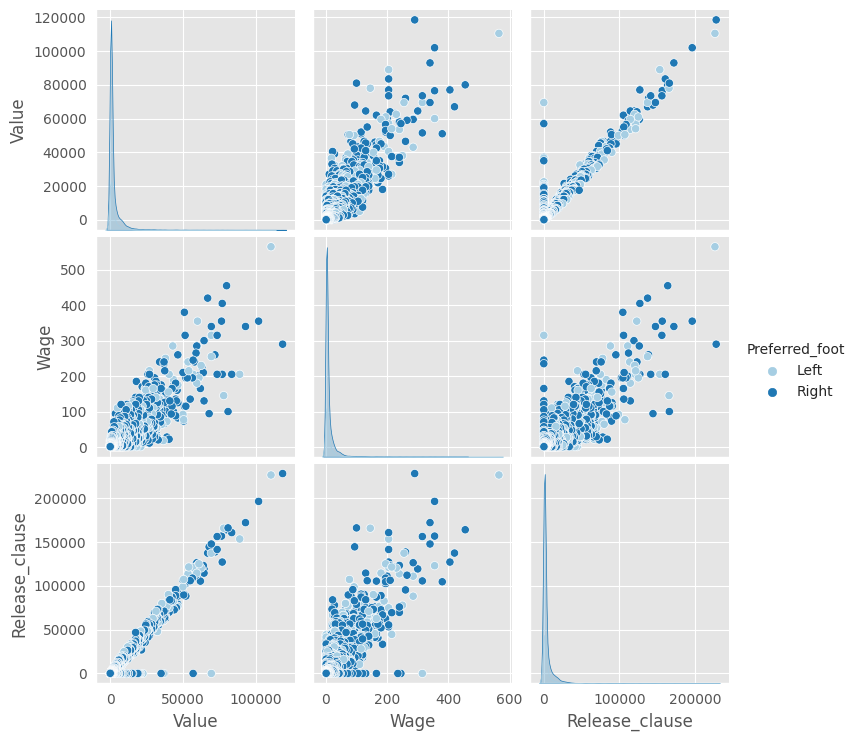

In [82]:
sb.pairplot(dataframe[['Value', 'Wage', 'Release_clause', 'Preferred_foot']], hue='Preferred_foot',palette=sb.color_palette("Paired"))


/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/jerry/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/jerr

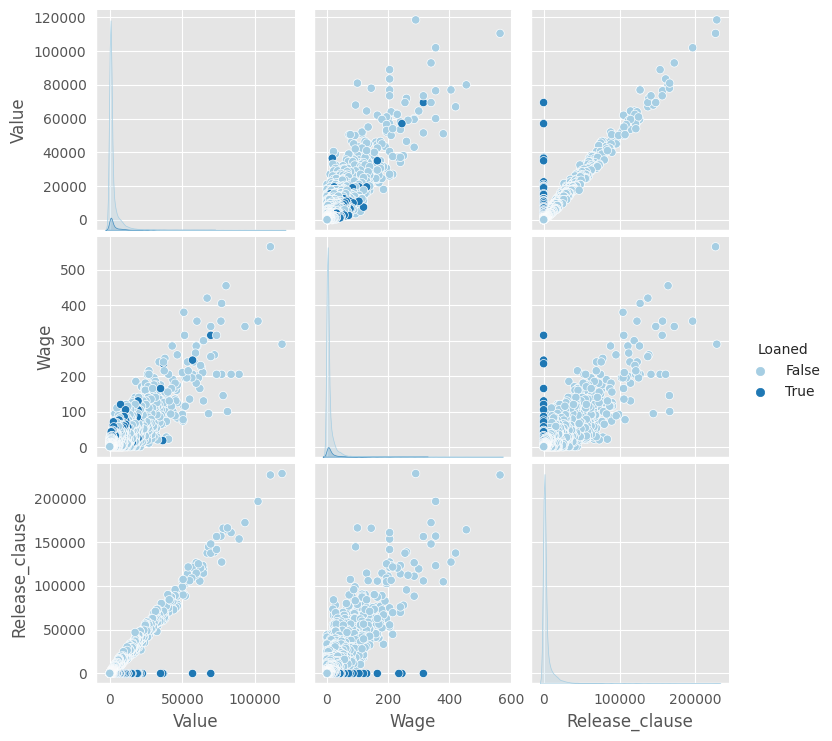

In [80]:
sb.pairplot(dataframe[['Value', 'Wage', 'Release_clause', 'Loaned']], hue='Loaned',palette=sb.color_palette("Paired"))


In [83]:
positionDataframe

,Position,Frequency
0,ST,2130
1,GK,1992
2,CB,1754
3,CM,1377
4,LB,1305
5,RB,1268
6,RM,1114
7,LM,1086
8,CAM,948
9,CDM,936
